In [1]:
import pandas as pd

In [77]:
customers = pd.read_csv("customers.csv")
transactions = pd.read_csv("transactions.csv")
branches= pd.read_csv("branches.csv")
cities= pd.read_csv("cities.csv")
genders= pd.read_csv("genders.csv")
merchants= pd.read_csv("merchants.csv")
print(merchants.columns)
print(genders.columns)
print(cities.columns)
print(branches.columns)
print(transactions.columns)
print(customers.columns)

Index(['merchant_id', 'merchant_name'], dtype='object')
Index(['gender_id', 'gender_name'], dtype='object')
Index(['city_id', 'city_name'], dtype='object')
Index(['branch_id', 'merchant_id'], dtype='object')
Index(['transaction_id', 'customer_id', 'transaction_date',
       'transaction_status', 'coupon_name', 'burn_date', 'branch_id'],
      dtype='object')
Index(['customer_id', 'join_date', 'city_id', 'gender_id'], dtype='object')


# Data preprocessing

In [83]:
custmer_data = pd.merge(customers,genders,on="gender_id")

Index(['customer_id', 'join_date', 'city_id', 'gender_id', 'gender_name'], dtype='object')


In [42]:
custmer_data = pd.merge(custmer_data,transactions,on="customer_id")

Index(['customer_id', 'join_date', 'city_id', 'gender_id', 'gender_name',
       'transaction_id', 'transaction_date', 'transaction_status',
       'coupon_name', 'burn_date', 'branch_id'],
      dtype='object')


In [43]:
custmer_data = pd.merge(custmer_data,branches,on="branch_id")

Index(['customer_id', 'join_date', 'city_id', 'gender_id', 'gender_name',
       'transaction_id', 'transaction_date', 'transaction_status',
       'coupon_name', 'burn_date', 'branch_id', 'merchant_id'],
      dtype='object')


In [44]:
custmer_data = pd.merge(custmer_data,cities,on="city_id")

Index(['customer_id', 'join_date', 'city_id', 'gender_id', 'gender_name',
       'transaction_id', 'transaction_date', 'transaction_status',
       'coupon_name', 'burn_date', 'branch_id', 'merchant_id', 'city_name'],
      dtype='object')


In [45]:
custmer_data = pd.merge(custmer_data,merchants,on="merchant_id").fillna(0)
custmer_data.head()

,customer_id,join_date,city_id,gender_id,gender_name,transaction_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,merchant_id,city_name,merchant_name
0,1,2022-01-08,7,1,Male,178,2022-07-30,subscribed,SrP-866,0,8,20,Mansoura,Griffin-Leblanc
1,1,2022-01-08,7,1,Male,1929,2022-07-30,burned,QiG-754,2022-10-18,8,20,Mansoura,Griffin-Leblanc
2,91,2022-01-17,7,1,Male,4058,2023-05-01,subscribed,mhO-469,0,8,20,Mansoura,Griffin-Leblanc
3,165,2021-12-12,7,1,Male,1367,2023-07-23,burned,Ois-184,2023-08-18,8,20,Mansoura,Griffin-Leblanc
4,442,2023-11-02,7,1,Male,4098,2024-01-03,burned,sGR-086,2024-03-02,8,20,Mansoura,Griffin-Leblanc


In [46]:
custmer_data["join_date"] = pd.to_datetime(custmer_data["join_date"])
custmer_data["transaction_date"] = pd.to_datetime(custmer_data["transaction_date"])
custmer_data["burn_date"] = pd.to_datetime(custmer_data["transaction_date"])

custmer_data.head()

,customer_id,join_date,city_id,gender_id,gender_name,transaction_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,merchant_id,city_name,merchant_name
0,1,2022-01-08,7,1,Male,178,2022-07-30,subscribed,SrP-866,2022-07-30,8,20,Mansoura,Griffin-Leblanc
1,1,2022-01-08,7,1,Male,1929,2022-07-30,burned,QiG-754,2022-07-30,8,20,Mansoura,Griffin-Leblanc
2,91,2022-01-17,7,1,Male,4058,2023-05-01,subscribed,mhO-469,2023-05-01,8,20,Mansoura,Griffin-Leblanc
3,165,2021-12-12,7,1,Male,1367,2023-07-23,burned,Ois-184,2023-07-23,8,20,Mansoura,Griffin-Leblanc
4,442,2023-11-02,7,1,Male,4098,2024-01-03,burned,sGR-086,2024-01-03,8,20,Mansoura,Griffin-Leblanc


In [47]:
custmer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         5000 non-null   int64         
 1   join_date           5000 non-null   datetime64[ns]
 2   city_id             5000 non-null   int64         
 3   gender_id           5000 non-null   int64         
 4   gender_name         5000 non-null   object        
 5   transaction_id      5000 non-null   int64         
 6   transaction_date    5000 non-null   datetime64[ns]
 7   transaction_status  5000 non-null   object        
 8   coupon_name         5000 non-null   object        
 9   burn_date           5000 non-null   datetime64[ns]
 10  branch_id           5000 non-null   int64         
 11  merchant_id         5000 non-null   int64         
 12  city_name           5000 non-null   object        
 13  merchant_name       5000 non-null   object      

In [78]:
custmer_data["transaction_status"].unique()

array([1, 0], dtype=int8)

In [80]:
custmer_data["merchant_name"].unique()

array([3, 6, 1, 4, 0, 2, 7, 5], dtype=int8)

In [55]:
custmer_data["gender_name_cat"] = custmer_data["gender_name"].astype("category")
custmer_data["gender_name"] = custmer_data["gender_name_cat"].cat.codes

custmer_data["city_name_cat"] = custmer_data["city_name"].astype("category")
custmer_data["city_name"] = custmer_data["city_name_cat"].cat.codes

custmer_data["merchant_name_cat"] = custmer_data["merchant_name"].astype("category")
custmer_data["merchant_name"] = custmer_data["merchant_name_cat"].cat.codes

custmer_data["transaction_status_cat"] = custmer_data["transaction_status"].astype("category")
custmer_data["transaction_status"] = custmer_data["transaction_status_cat"].cat.codes

custmer_data["coupon_name_cat"] = custmer_data["coupon_name"].astype("category")
custmer_data["coupon_name"] = custmer_data["coupon_name_cat"].cat.codes

custmer_data = custmer_data.drop(columns=["coupon_name_cat","transaction_status_cat","merchant_name_cat","city_name_cat","gender_name_cat"])

In [56]:
custmer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         5000 non-null   int64         
 1   join_date           5000 non-null   datetime64[ns]
 2   city_id             5000 non-null   int64         
 3   gender_id           5000 non-null   int64         
 4   gender_name         5000 non-null   int8          
 5   transaction_id      5000 non-null   int64         
 6   transaction_date    5000 non-null   datetime64[ns]
 7   transaction_status  5000 non-null   int8          
 8   coupon_name         5000 non-null   int16         
 9   burn_date           5000 non-null   datetime64[ns]
 10  branch_id           5000 non-null   int64         
 11  merchant_id         5000 non-null   int64         
 12  city_name           5000 non-null   int8          
 13  merchant_name       5000 non-null   int8        

# EDA


In [57]:
import matplotlib.pyplot as plt


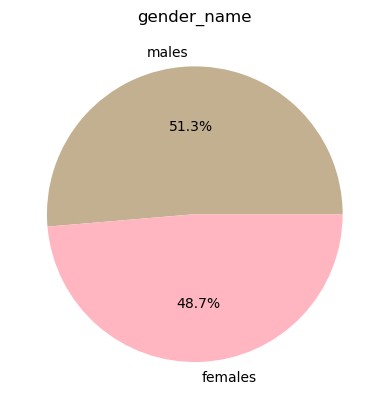

In [70]:
cat_count=[]
cat_pers = []
cat = ["males","females"]

for i in range(2):
    cat_count.append(custmer_data["gender_name"].value_counts().values[i])
    cat_pers.append(((custmer_data["gender_name"].value_counts().values[i])/custmer_data.shape[0])*100)
    
plt.pie(cat_pers, labels=cat,colors=["#C3B091","#FFB6C1"],autopct="%1.1f%%")
plt.title("gender_name")
plt.show()

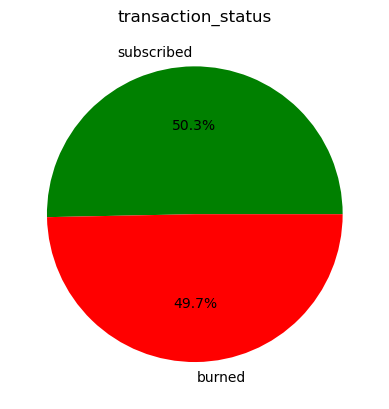

In [68]:
cat_count=[]
cat_pers = []
cat = ['subscribed', 'burned']

for i in range(2):
    cat_count.append(custmer_data["transaction_status"].value_counts().values[i])
    cat_pers.append(((custmer_data["transaction_status"].value_counts().values[i])/custmer_data.shape[0])*100)


plt.pie(cat_pers, labels=cat,colors=["g","r"], autopct="%1.1f%%")
plt.title("transaction_status")
plt.show()

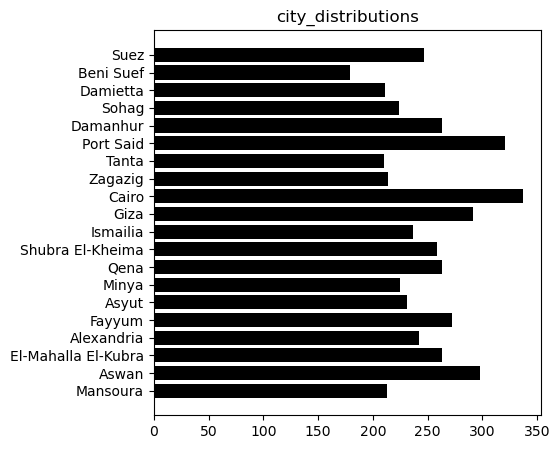

In [60]:
city_name_pers = []
city_name = ['Mansoura', 'Aswan', 'El-Mahalla El-Kubra', 'Alexandria', 'Fayyum',
       'Asyut', 'Minya', 'Qena', 'Shubra El-Kheima', 'Ismailia', 'Giza',
       'Cairo', 'Zagazig', 'Tanta', 'Port Said', 'Damanhur', 'Sohag',
       'Damietta', 'Beni Suef', 'Suez']

for i in custmer_data["city_name"].unique() :
    city_name_pers.append((custmer_data["city_name"]==i).sum())
    
plt.figure(figsize=(5,5))
plt.barh(city_name,city_name_pers,color="k")
plt.title("city_distributions")
plt.show()


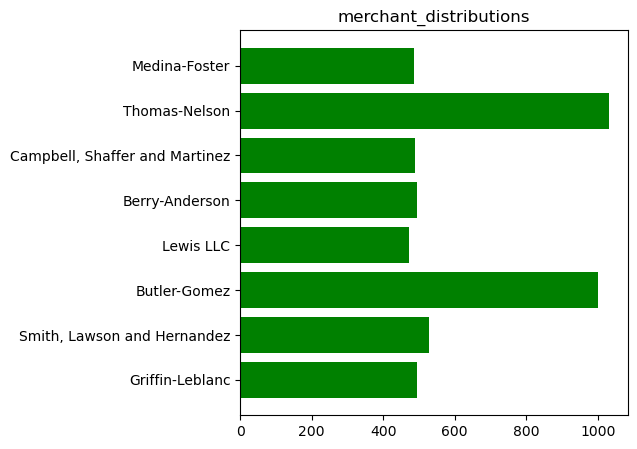

In [82]:
merchant_name_pers = []
merchant_name = ['Griffin-Leblanc', 'Smith, Lawson and Hernandez', 'Butler-Gomez',
       'Lewis LLC', 'Berry-Anderson', 'Campbell, Shaffer and Martinez',
       'Thomas-Nelson', 'Medina-Foster']

for i in custmer_data["merchant_name"].unique() :
    merchant_name_pers.append((custmer_data["merchant_name"]==i).sum())
    
plt.figure(figsize=(5,5))
plt.barh(merchant_name,merchant_name_pers,color="g")
plt.title("merchant_distributions")
plt.show()

# Feature Selection and The Model Implementation


In [62]:
feature = ["gender_name","coupon_name","city_name","merchant_name"]
x = custmer_data[feature]
x.head()

,gender_name,coupon_name,city_name,merchant_name
0,1,1800,11,3
1,1,1596,11,3
2,1,3703,11,3
3,1,1402,11,3
4,1,4257,11,3


In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [72]:
inertia = []
silhouette_scores = []
for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(x)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(x, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")


For n_clusters = 2, the average silhouette_score is: 0.6265166126429738
For n_clusters = 3, the average silhouette_score is: 0.589788392301078
For n_clusters = 4, the average silhouette_score is: 0.5713211938564182
For n_clusters = 5, the average silhouette_score is: 0.5602040471728882
For n_clusters = 6, the average silhouette_score is: 0.5526896681204833
For n_clusters = 7, the average silhouette_score is: 0.5471251103828018
For n_clusters = 8, the average silhouette_score is: 0.5429873764046742
For n_clusters = 9, the average silhouette_score is: 0.5389938575466421
For n_clusters = 10, the average silhouette_score is: 0.5370318558744844
For n_clusters = 11, the average silhouette_score is: 0.5337214050140401
For n_clusters = 12, the average silhouette_score is: 0.5324742638696452
For n_clusters = 13, the average silhouette_score is: 0.5310250828320044
For n_clusters = 14, the average silhouette_score is: 0.5289549221022473
For n_clusters = 15, the average silhouette_score is: 0.5274

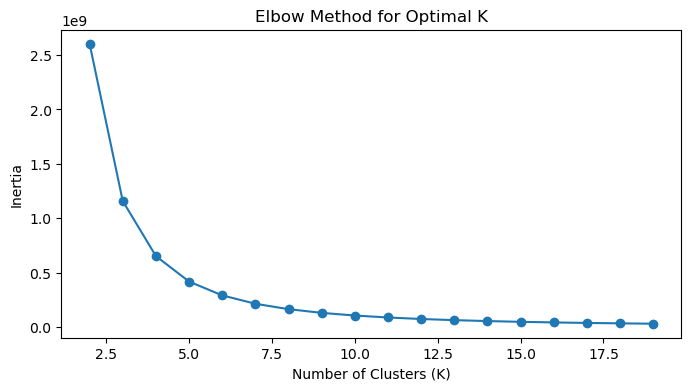

In [73]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 20), inertia,marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [74]:
optimal_k = 5  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(x)

custmer_data['cluster'] = cluster_labels
custmer_data.head()

,customer_id,join_date,city_id,gender_id,gender_name,transaction_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,merchant_id,city_name,merchant_name,cluster
0,1,2022-01-08,7,1,1,178,2022-07-30,1,1800,2022-07-30,8,20,11,3,0
1,1,2022-01-08,7,1,1,1929,2022-07-30,0,1596,2022-07-30,8,20,11,3,0
2,91,2022-01-17,7,1,1,4058,2023-05-01,1,3703,2023-05-01,8,20,11,3,1
3,165,2021-12-12,7,1,1,1367,2023-07-23,0,1402,2023-07-23,8,20,11,3,0
4,442,2023-11-02,7,1,1,4098,2024-01-03,0,4257,2024-01-03,8,20,11,3,2


# Exploring The Clusters

In [75]:
for i in range(optimal_k):
    print(f"Segment {i}:")
    segment_data = custmer_data[custmer_data['cluster'] == i]
    print(segment_data[feature].describe())

Segment 0:
       gender_name  coupon_name   city_name  merchant_name
count   996.000000   996.000000  996.000000     996.000000
mean      0.528112  1500.500000    9.209839       3.546185
std       0.499460   287.664735    5.744050       2.436093
min       0.000000  1003.000000    0.000000       0.000000
25%       0.000000  1251.750000    4.000000       1.000000
50%       1.000000  1500.500000    9.000000       3.000000
75%       1.000000  1749.250000   14.000000       6.000000
max       1.000000  1998.000000   19.000000       7.000000
Segment 1:
       gender_name  coupon_name    city_name  merchant_name
count  1000.000000  1000.000000  1000.000000    1000.000000
mean      0.529000  3492.500000     9.374000       3.638000
std       0.499408   288.819436     5.728083       2.454584
min       0.000000  2993.000000     0.000000       0.000000
25%       0.000000  3242.750000     4.000000       1.000000
50%       1.000000  3492.500000     9.000000       4.000000
75%       1.000000  3742.25